In [1]:
import numpy as np
import pyswarms as ps
from scipy.stats import mode
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [22]:
def fitness_plot(x, *args):
    return x[0]**3+2*np.sin(x[0])**2+2*x[0]*x[1]+np.cos(2*x[1]**2)+2*x[1]+1

def fitness(x, *args):
    return x[:,0]**3+2*np.sin(x[:,0])**2+2*x[:,0]*x[:,1]+np.cos(2*x[:,1]**2)+2*x[:,1]+1

def fitness_disc(x, *args):
    x = x.astype('int')
    return x[:,0]**3+2*np.sin(x[:,0])**2+2*x[:,0]*x[:,1]+np.cos(2*x[:,1]**2)+2*x[:,1]+1

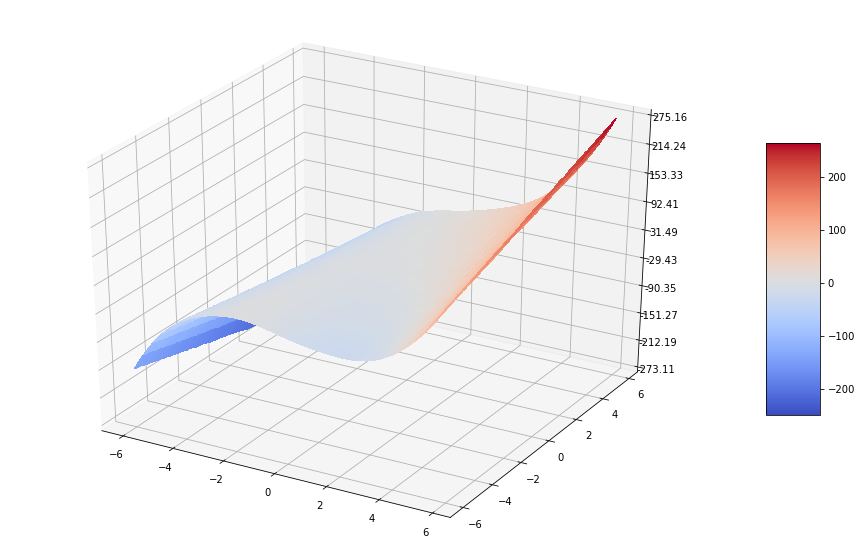

In [4]:
X = np.array([np.arange(-6,6,0.2), np.arange(-6,6,0.2)])

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

# Make data.
xx = X[0]
yy = X[1]
xx, yy = np.meshgrid(xx, yy)
Z = fitness_plot([xx,yy])

# Plot the surface.
surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Global Best

In [5]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fitness, iters=100)

2020-09-06 21:07:40,162 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-2.69e+5
2020-09-06 21:07:40,656 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -268890.0704802861, best pos: [-64.49087977   5.28864369]


Wall time: 534 ms


## Local Best

In [8]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2}

# Call instance of LBestPSO with a neighbour-size of 3 determined by
# the L2 (p=2) distance.
optimizer = ps.single.LocalBestPSO(n_particles=10, dimensions=2, bounds=([-6, -6], [6, 6]),
                                   options=options)

# Perform optimization
stats = optimizer.optimize(fitness, iters=100)

2020-09-06 21:09:44,756 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=-269
2020-09-06 21:09:45,099 - pyswarms.single.local_best - INFO - Optimization finished | best cost: -269.1169710766736, best pos: [-5.9879168  5.4762021]


Wall time: 360 ms


## Discrete

In [24]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2}

# Call instance of LBestPSO with a neighbour-size of 3 determined by
# the L2 (p=2) distance.
optimizer = ps.single.LocalBestPSO(n_particles=10, dimensions=2, bounds=([-6, -6], [6, 6]),
                                   options=options)

# Perform optimization
stats = optimizer.optimize(fitness_disc, iters=100)

2020-09-06 21:51:36,364 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2}

pyswarms.single.local_best:   0%|          |0/100
pyswarms.single.local_best:   0%|          |0/100, best_cost=-79.2
pyswarms.single.local_best:   0%|          |0/100, best_cost=-79.2
pyswarms.single.local_best:   0%|          |0/100, best_cost=-79.2
pyswarms.single.local_best:   0%|          |0/100, best_cost=-85  
pyswarms.single.local_best:   0%|          |0/100, best_cost=-85
pyswarms.single.local_best:   0%|          |0/100, best_cost=-85
pyswarms.single.local_best:   0%|          |0/100, best_cost=-90.9
pyswarms.single.local_best:   0%|          |0/100, best_cost=-90.9
pyswarms.single.local_best:   0%|          |0/100, best_cost=-90.9
pyswarms.single.local_best:   0%|          |0/100, best_cost=-90.9
pyswarms.single.local_best:   0%|          |0/100, best_cost=-90.9
pyswarms.single.local_best:   0%|          |0/100, best_cost=-90.9
pyswarms.s

Wall time: 693 ms
